# Face Detection using HOG Features and an SVM Classifier

## Description
Face Detection is a computer vision problem that aims to attempt to accurately identify human faces that may, or may not, be present in a given photograph or video. Many efforts have been directed at this problem since the early 2000's, with it having started as a subbranch of the problem of Object-Class Detection but having evolved into a main focus of machine learning algorithms due to its prevalence and paramountcy to the paradigm of Facial Recognition, another problem that is nowadays used in a wide-branch of technologies and biometrics.

## Face Detection Function

### Imports

In [1]:
import cv2
import os
from os import listdir
from os.path import isfile, join
import time
from matplotlib import pyplot as plt

from skimage.feature import hog
from skimage import data, color, feature, exposure

from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

from sklearn.utils import shuffle

from sklearn.model_selection import GridSearchCV

import numpy as np

### Creating the HOG Images

#### Resize and Grayscale Images

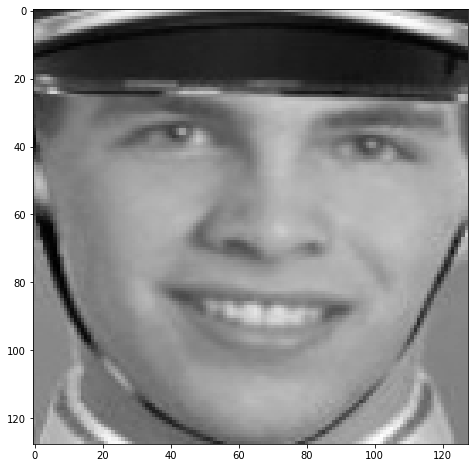

In [2]:
img = cv2.imread('./ImageResources/Dataset/WIDER_train/cropped_images/positive/Image0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA) 


#cv2.imshow("Detected Faces", img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

plt.figure(figsize=(12,8))
plt.imshow(img, cmap='gray')
plt.show()

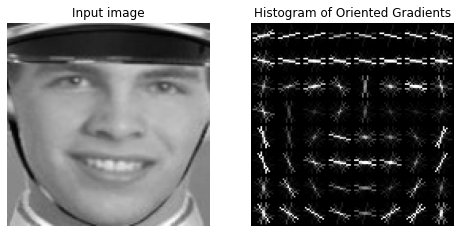

In [3]:
fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


### Positive Train Set

In [5]:
x_train = []
y_train = []

path = "./ImageResources/Dataset/WIDER_train/cropped_images/"

print("Creating Positive HOG")
with open(path+"positive_info.dat", "r") as reader:
    for line in reader:
        line = line.split("\t")[0]
        img = cv2.imread(path+line)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA) 

        hog_features, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True)

        x_train.append(hog_features)
        y_train.append(1)

print("Creating Negative HOG")
with open(path+"negative_info.txt", "r") as reader:
    for line in reader:
        line = line[:-1]
        img = cv2.imread(path+line)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA) 

        hog_features, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True)

        x_train.append(hog_features)
        y_train.append(0)

Creating Positive HOG
Creating Negative HOG
Shuffling


NameError: name 'shuffle' is not defined

In [16]:
x_train = np.array(x_train)
y_train = np.array(y_train)

print("Shuffling")
x_train, y_train = shuffle(x_train, y_train)

print(y_train.shape)

Shuffling
(24005,)


### Training SVC (State Vector Classifier)

In [20]:
grid = GridSearchCV(svm.LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(x_train, y_train)
grid.best_score_
grid.best_params_

/home/ds/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ds/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ds/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ds/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


KeyboardInterrupt: 

In [17]:
model = grid.best_estimator_
model.fit(X_train, y_train)

NameError: name 'grid' is not defined

In [10]:
img = cv2.imread('./ImageResources/Dataset/WIDER_train/cropped_images/positive/Image0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA) 

hog_features, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True)

print(classifier.predict(hog_image))

ValueError: X.shape[1] = 128 should be equal to 512, the number of features at training time

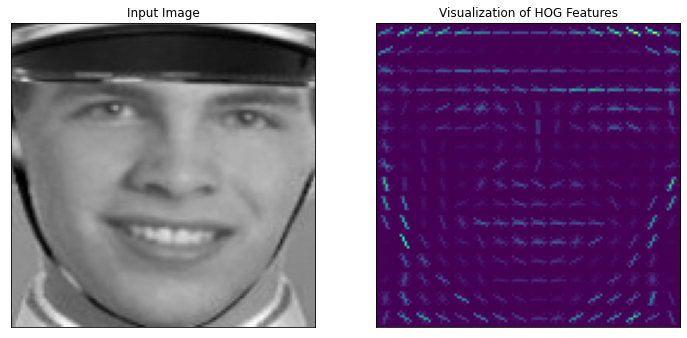

In [2]:
from skimage import data, color, feature
import skimage.data

img = cv2.imread('./ImageResources/Dataset/WIDER_train/cropped_images/positive/Image0.jpg')
img = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA) 
image = color.rgb2gray(img)
hog_vec, hog_vis = feature.hog(image, visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input Image')

ax[1].imshow(hog_vis)
ax[1].set_title('Visualization of HOG Features');

In [3]:
x_train = []
y_train = []


path = "./ImageResources/Dataset/WIDER_train/cropped_images/"

print("Getting Positive Images")
with open(path+"positive_info.dat", "r") as reader:
    for line in reader:
        line = line.split("\t")[0]
        img = cv2.imread(path+line)
        img = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA) 
        image = color.rgb2gray(img)
        
        x_train.append(feature.hog(img))
        y_train.append(1)
        
print("Done")
print("Getting Negative Images")
with open(path+"negative_info.txt", "r") as reader:
    for line in reader:
        line = line[:-1]
        img = cv2.imread(path+line)
        img = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA) 
        image = color.rgb2gray(img)
        
        x_train.append(feature.hog(img))
        y_train.append(0)

print("Done")

Getting Positive Images
Done
Getting Negative Images
Done


In [4]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [5]:
print("Shuffling")
x_train, y_train = shuffle(x_train, y_train)
print("Done")

Shuffling
Done


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(x_train, y_train)
grid.best_score_

